In [1]:
from matplotlib import pyplot as plt

In [2]:
age_x= [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] #The x-axis accounts for the age of the develeopers 
dev_y= [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752] #The y-axis accounts for the salary of each developers.
js_dev_y=[37810, 43515, 46823, 49293, 53437, 56375, 62375, 66674, 68745, 68746, 74583]
py_dev_y= [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]

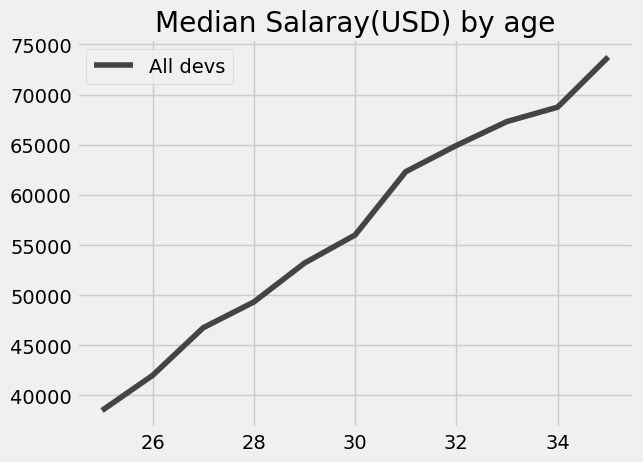

In [3]:
plt.style.use('fivethirtyeight')
plt.plot(age_x, dev_y, color= '#444444', label= 'All devs')
plt.legend()
plt.title('Median Salaray(USD) by age')
plt.show()

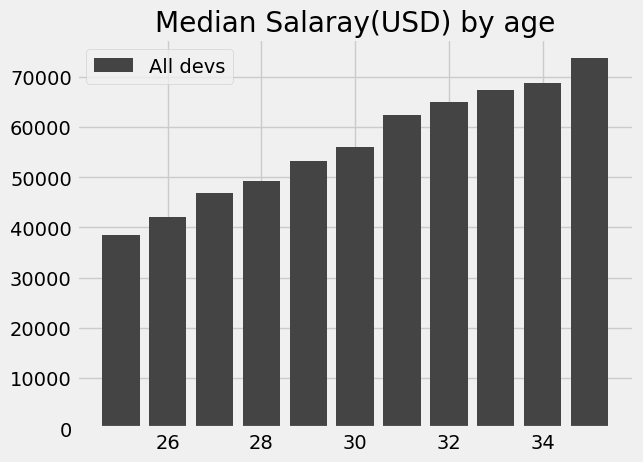

In [4]:
plt.bar(age_x, dev_y, color= '#444444', label= 'All devs')
plt.legend()
plt.title('Median Salaray(USD) by age')
plt.show()

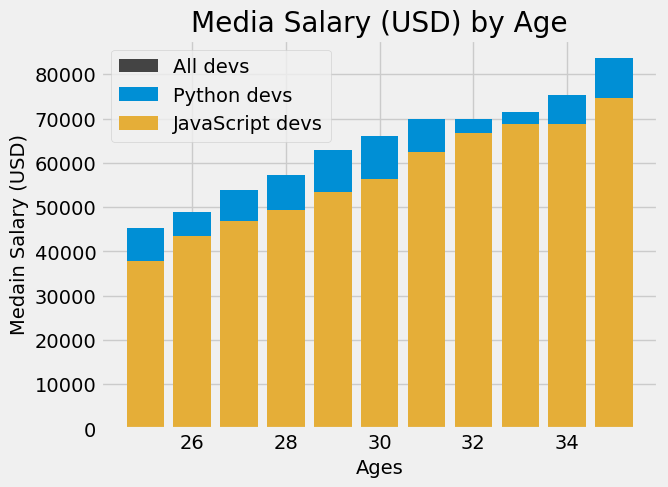

In [5]:
#Note this version of bar chat does not display the data in a very concise manner, for example the javaScript bar overlaps the python all dev
plt.bar(age_x, dev_y, color= '#444444', label= 'All devs')
plt.bar(age_x, py_dev_y, color= '#008fd5', label= 'Python devs')
plt.bar(age_x, js_dev_y, color= '#e5ae38', label='JavaScript devs')
plt.legend()
plt.title('Media Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Medain Salary (USD)')
plt.show()

In [6]:
#To do this more properly, we need to apply a method from numpy which would convert our list of values to an array and allow us the easily make adjuments to our bar chat
import numpy as np

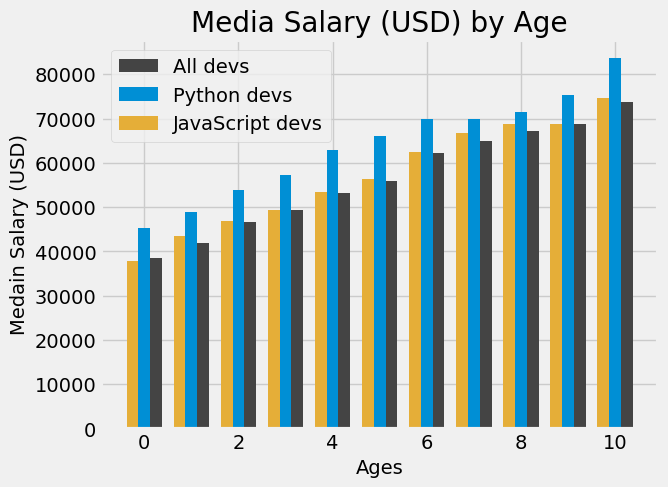

In [7]:
#We could shift our bar from the same spot the be plotted in the same age but at different position by adjusting the width
x_indexes= np.arange(len(age_x))
width= 0.25 #Fixing a value for our width
plt.bar(x_indexes+width, dev_y, color= '#444444', width= width, label= 'All devs')
plt.bar(x_indexes, py_dev_y, color= '#008fd5', width=width, label= 'Python devs')
plt.bar(x_indexes-width, js_dev_y, color= '#e5ae38', width= width, label='JavaScript devs')
plt.legend()
plt.title('Media Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Medain Salary (USD)')
plt.show()

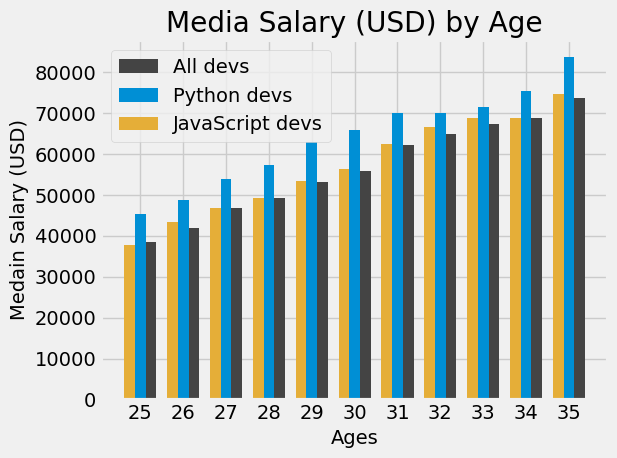

In [8]:
x_indexes= np.arange(len(age_x))
width= 0.25 #Fixing a value for our width
plt.bar(x_indexes+width, dev_y, color= '#444444', width= width, label= 'All devs')
plt.bar(x_indexes, py_dev_y, color= '#008fd5', width=width, label= 'Python devs')
plt.bar(x_indexes-width, js_dev_y, color= '#e5ae38', width= width, label='JavaScript devs')
plt.legend()
plt.title('Media Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Medain Salary (USD)')
plt.xticks(ticks= x_indexes, labels= age_x) # To reset the actual number for the X
plt.tight_layout()
plt.show()

## Making Horizontal Bar Charts

In [9]:
import pandas as pd
import csv
from collections import Counter

In [10]:
df= pd.read_csv('data/survey_results_public.csv', index_col= 'Respondent')

In [11]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [12]:
lan_df= df['LanguageWorkedWith']

In [13]:
lan_df.to_csv('data/lan_mod.csv')

In [14]:
with open('data/lan_mod.csv') as csv_file:
    csv_reader= csv.DictReader(csv_file)
    
    row= next(csv_reader)
    print(row['LanguageWorkedWith'].split(';'))

['HTML/CSS', 'Java', 'JavaScript', 'Python']


In [15]:
with open('data/lan_mod.csv') as csv_file:
    csv_reader= csv.DictReader(csv_file)
    
    language_counter= Counter()
    for row in csv_reader:
        language_counter.update((row['LanguageWorkedWith'].split(';')))
print(language_counter)
print('\n----------------\n')
print(language_counter.most_common(10))

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, '': 1314, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})

----------------

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523)]


In [16]:
#Since we need the languages and the popularity(frequency) of the language in seperate list before we could plot a graph
#We need to extract both the keys and the frequency into two seperate list:

with open('data/lan_mod.csv') as csv_file:
    csv_reader= csv.DictReader(csv_file)
    
    language_counter= Counter()
    for row in csv_reader:
        language_counter.update((row['LanguageWorkedWith'].split(';')))
        
languages= []
popularity= []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


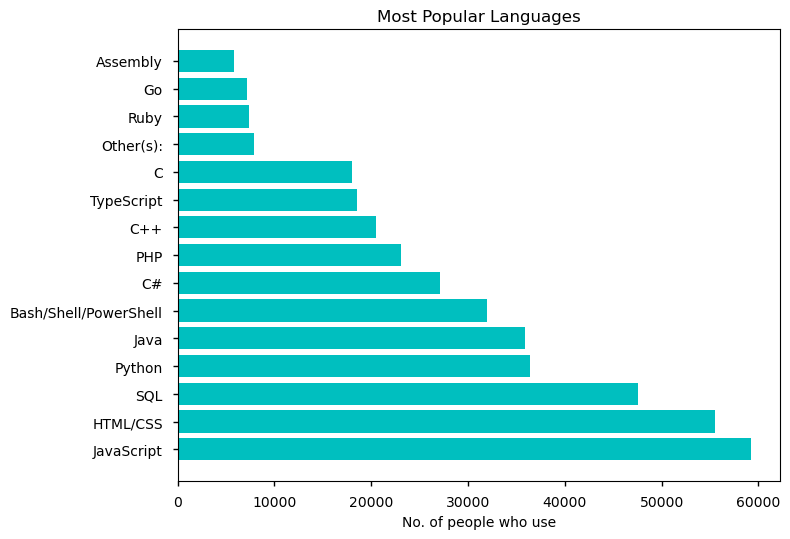

In [49]:
#Now since we have seperated the dictionary into two seperate lists we could plot with the data set
plt.barh(languages, popularity, color= 'c')
#plt.style.use('seaborn-v0_8-notebook')
plt.title('Most Popular Languages')
plt.xlabel('No. of people who use')
#plt.rcdefaults()
plt.tight_layout()
plt.show()

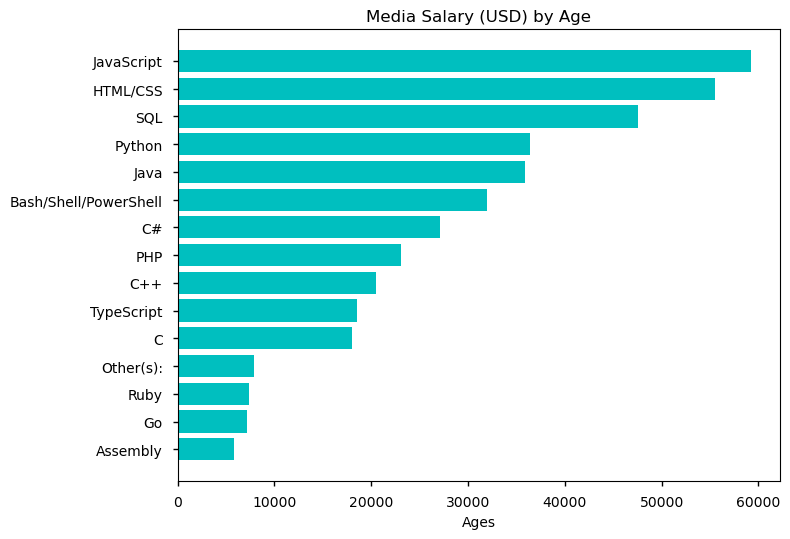

In [25]:
plt.barh(languages, popularity, color= 'c')
#plt.style.use('seaborn-v0_8-notebook')
languages.reverse()
popularity.reverse()
plt.title('Most popular programmming languages')
plt.xlabel('Number of people that uses them')
#plt.rcdefaults()
plt.tight_layout()
plt.show()

In [27]:
#In cases where the file is already a csv file and we want to read the data into uor jupyter
data= pd.read_csv('data/lan_mod.csv')

In [52]:
ids= data['Respondent']
lan_resp= data['LanguageWorkedWith']

language_counter= Counter()
for responses in lan_resp:
    language_counter.update(responses.split(';'))
        
prog_lan= []
freq_used= []

for item in language_counter.most_common(15):
    prog_lan.append(item[0])
    freq_used.append(item[1])
print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly', 'JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833, 59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


In [42]:
data.dropna(axis= 'index', how= 'any', inplace= True)

In [43]:
data.isna()

,Respondent,LanguageWorkedWith
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
88875,False,False
88876,False,False
88877,False,False
88878,False,False


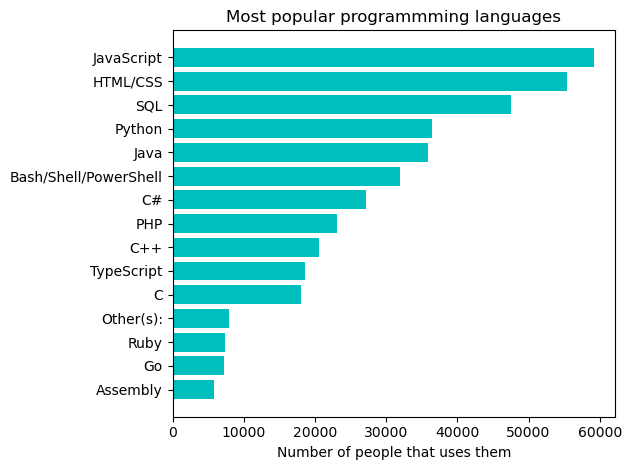

In [54]:
plt.barh(prog_lan, freq_used, color= 'c')
#plt.style.use('seaborn-v0_8-notebook')
prog_lan.reverse()
freq_used.reverse()
plt.title('Most popular programmming languages')
plt.xlabel('Number of people that uses them')
plt.rcdefaults()
plt.tight_layout()
plt.show()